# Demonstrate Getting a Structure and Making an Image

This notebook will demonstrate getting a molecular structure here and rendering an image of it with PyMol.

Return to [the first page](index.ipynb) for the demonstration notebook [index](index.ipynb).

----

<div class="alert alert-block alert-warning">
<p>If you haven't used one of these notebooks before, they're basically web pages in which you can write, edit, and run live code. They're meant to encourage experimentation, so don't feel nervous. Just try running a few cells and see what happens!.</p>

<p>
    Some tips:
    <ul>
        <li>Code cells have boxes around them. When you hover over them a <i class="fa-step-forward fa"></i> icon appears.</li>
        <li>To run a code cell either click the <i class="fa-step-forward fa"></i> icon, or click on the cell and then hit <b>Shift+Enter</b>. The <b>Shift+Enter</b> combo will also move you to the next cell, so it's a quick way to work through the notebook.</li>
        <li>While a cell is running a <b>*</b> appears in the square brackets next to the cell. Once the cell has finished running the asterix will be replaced with a number.</li>
        <li>In most cases you'll want to start from the top of notebook and work your way down running each cell in turn. Later cells might depend on the results of earlier ones.</li>
        <li>To edit a code cell, just click on it and type stuff. Remember to run the cell once you've finished editing.</li>
    </ul>
</p>
</div>


---

## Preparation

The intial parts to set up to send commands to PyMol are the same and so we'll define those as block of code we can prepend in front of special things to do.

In [1]:
init_block = '''#!/usr/bin/python

import sys, os

# pymol environment
moddir='/opt/pymol-svn/modules'
sys.path.insert(0, moddir)
os.environ['PYMOL_PATH'] = os.path.join(moddir, 'pymol/pymol_path')

import pymol
cmd = pymol.cmd
'''

With a block of code defined that we can use within this running notebook, we can now step through each of the basic steps to get a structure and make an image using it with PyMol.

## Retrieving a structure

Let's define a command to get a structuure. The command to run, Pymol's `fetch` command, is between the outer quotes because for now we just want to define what we intend to run.

In [2]:
cmd2run = "cmd.fetch('1d66')"

Let's use the `init_block` now to combine it with the command to run and make a script to get a structure file.

In [3]:
script_txt = init_block + cmd2run
%store script_txt >script_f.py

Writing 'script_txt' (str) to file 'script_f.py'.


Let's run that script and get the structure.

In [4]:
!pymol -cq script_f.py

 ExecutiveLoad-Detail: Detected mmCIF


Let's see if that got the structure by running the next cell which shows the contents of that directory.

In [5]:
ls

1d66.cif                demo_colors.ipynb                       script_exp.py
1d66improved.png        demo_fetch.ipynb                        script_f.py
1d66.pdb                demo_orient.ipynb                       script_fs.py
1d66.png                demo_palette.ipynb                      script_o.py
2zi0.png                demo_residue_secondary_structure.ipynb  script_sec.py
demo_apply_combo.ipynb  illustrate_std_demo.ipynb


Note that `1rpu.txt` is now among the list of files in the working directory.

## Making an image with the retrieved file

With a structure file in hand, we can use it to make an image.

The next few cells build on the example on the first notebook page to make an image. Mostly we are using the defaults for now.

In [6]:
cmds2run = '''cmd.load('1d66.cif');cmd.zoom()
cmd.png('2zi0.png', 800, 800, dpi=300, ray=1)
'''

In [7]:
script_txt = init_block + cmds2run
%store script_txt >script_fs.py

Writing 'script_txt' (str) to file 'script_fs.py'.


In [8]:
!pymol -cq script_fs.py

 ExecutiveLoad-Detail: Detected mmCIF
 Ray: render time: 4.80 sec. = 749.4 frames/hour (4.80 sec. accum.).


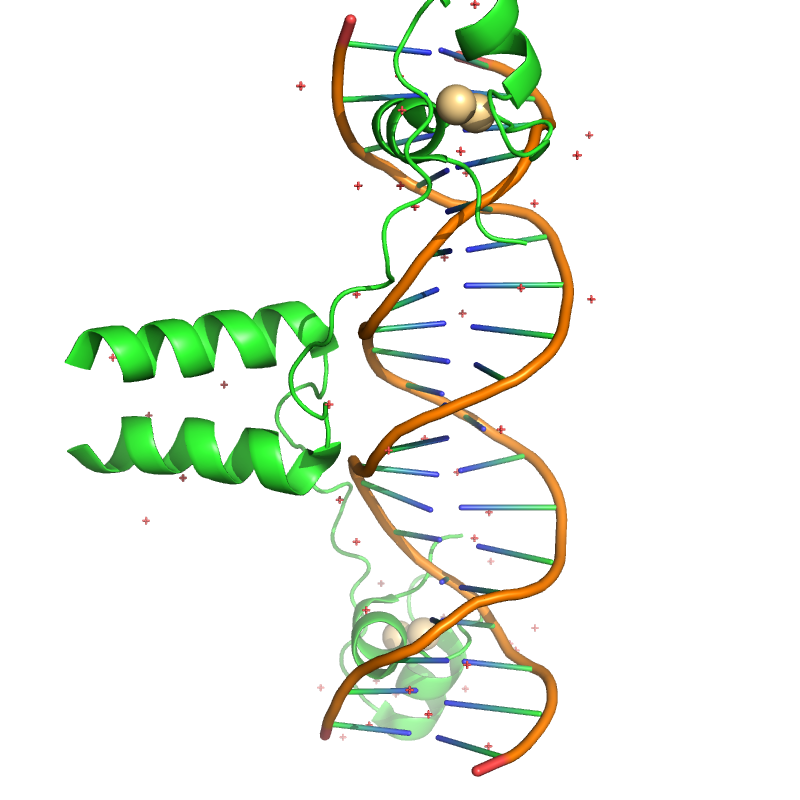

In [9]:
from IPython.display import Image
Image("2zi0.png")

## Putting it all together and customizing

Note that the steps above were done separately for the sake of making clear what was happening. It is possible to get a structure and render an image of it all at once. This section will demonstrate that as well as touch on how to customize things.



(I thought there would be a way in the Jupyter environment to skipping saving the commands to send to PyMol as an actual script. I tried `io.StringIO`, which works with text docstrings to send tables into Pandas), `io.BytesIO(text_2_save.encode())`, and even `filelike.to_filelike()` from [here](http://www.rfk.id.au/software/filelike/) and I wasn't able to find the magic combination to make it work without the file intermediate. If I ever get it working, this is where I'd put that in the growing collection of notebooks. Because it might help (or at least dissuade me from attempting more), one think I learned in the course of that: I think PyMol is examining the extension of the filename because sometimes when I add a final line line about making a `.png` file in the script it would say unsupported and show `.png` at the end even though `.png` was back much farther towards the start of the code of the final line I tried to feed in with: `a = filelike.to_filelike(text_2_save); !pymol -cq "{a.read()}"`. Update: I explored and now I see maybe what it is also an issue. They specifically say to use the Pymol as the interpreter and doing that puts you out of the normal Python environment and that contributes to the typical Jupyter-environment/Python tricks breaking. And you must use their approach because, for example, while the folowing code works pasted into a notebook cell.

```python
from pymol import cmd
cmd.fetch('1trn')
```

The following doesn't work and instead reports several file not found errors and exceptions.
```python
from pymol import cmd
cmd.fragment('ala')
```
So once you go into using the Pymol interpreter you cannot use the typical Jupyter-environment tricks because I think PyMol is really focused on the file extensions, as the wiki [load](https://pymolwiki.org/index.php/Load) and [save](https://pymolwiki.org/index.php/Save) pages suggest.)

And so let's get a different structure and make the do some coloring and quality changes while customizing.

In [10]:
cmds2run = '''cmd.fetch('1d66');cmd.zoom()
cmd.set ("ray_opaque_background", 0)
cmd.bg_color ("white")
cmd.set ("cartoon_fancy_helices", 1)
cmd.set ("cartoon_side_chain_helper", "on")
cmd.hide ("everything", "all")
cmd.show ("cartoon", "all")
cmd.util.cbc()
cmd.show ("sphere", "metals")
cmd.png('1d66.png', 800, 800, dpi=300, ray=1)
'''

Brief rundown of some of those commands:

- You'll note that we don't include a `cmd.load()` like we did above in the two-step example. That is because by default, PyMol brings in a fetched molecule into the current environment as well. In the case of the above 'two-step' processing, each step was perfromed by a separate 'environment'. And so druing the second step the `cmd.load()` was used to bring in a previously fetched structure into the active environment at that time.

- `cmd.set ("ray_opaque_background", 0)` sets the image with a transparent background. Use `cmd.set ("ray_opaque_background", 1)` if you want opaque. (I would like to note that I found running the examples like above that the default is to produce an image with a transparent background. Curiously, I believe the default for the tpyical PyMol GUI launches with is the opposite in that it defaults where the background is opaque. For that reason, I suggest including an explicit assignmemt of this state.)

- `cmd.bg_color ("white")` sets the background color explicitly to white. 

- The `hide` and `show` commands are included so that only the cartoon representations are shown. You'll note the 'two-step' example at the start of this notebook produced an image with some red plus signs. We don't want that and so we hide everything and then turn on the typical cartoon representations.

- `cmd.util.cbc()` applies the [color by chain (cbc) utility command](https://pymolwiki.org/index.php/CBC) with the default settings. This results in each chain being color differently. This helps show this protein is a dimer bound to DNA.

- `cmd.show ("sphere", "metals")` sets the metals to display as spheres. The ions were hidden earlier along with everything else by the `hide` step.

Let's process those commands.

Writing 'script_txt' (str) to file 'script_o.py'.
 ExecutiveLoad-Detail: Detected mmCIF
 Ray: render time: 5.16 sec. = 697.2 frames/hour (5.16 sec. accum.).


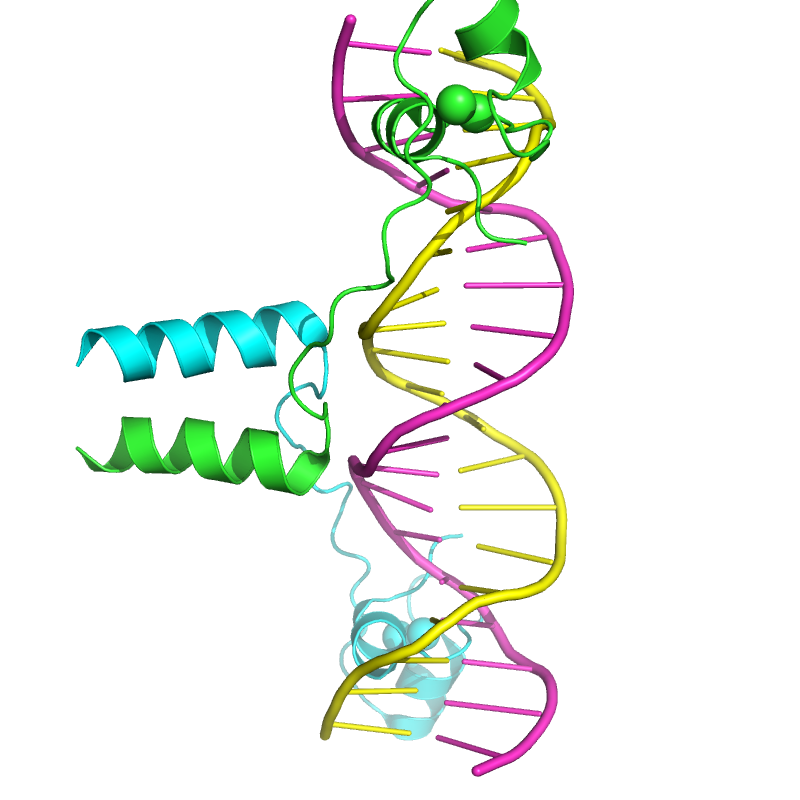

In [11]:
script_txt = init_block + cmds2run
%store script_txt >script_o.py
!pymol -cq script_o.py
from IPython.display import Image
Image("1d66.png")

Nice.  
However, there are some issues.

- The ions are colored differently because they are assigned a chain association and got colored per chain. Let's color those ions all the same color since [the structure 1d66 only contains one type of ion](https://www.rcsb.org/structure/1d66), specifically cadmium which is [common as a substitute for zinc in crystallography](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5505155/).

- It would be nice if both strands of the DNA were a single color since this protein is a DNA binding protein. That way we emphasize the ligand of the dimer is double-stranded DNA.

- The fog seems too drastic, covering the back of one of the strands of the DNA.

Let's edit our script to address those.

Writing 'script_txt' (str) to file 'script_o.py'.
 ExecutiveLoad-Detail: Detected mmCIF
 Ray: render time: 5.61 sec. = 641.6 frames/hour (5.61 sec. accum.).


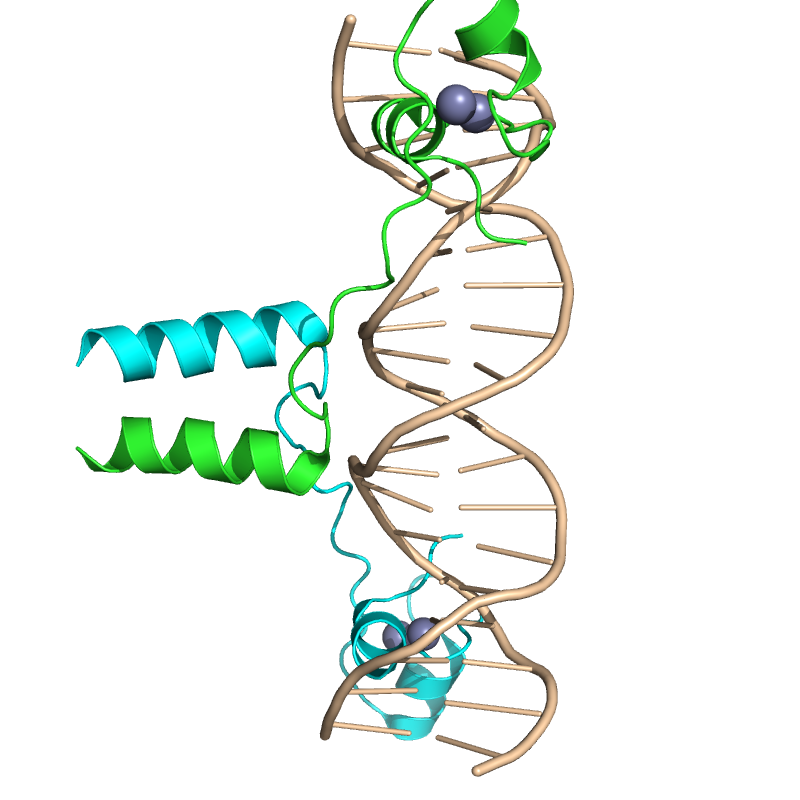

In [12]:
cmds2run = '''cmd.fetch('1d66');cmd.zoom()
cmd.set ("ray_opaque_background", 0)
cmd.bg_color ("white")
cmd.set ("cartoon_fancy_helices", 1)
cmd.set ("cartoon_side_chain_helper", "on")
cmd.hide ("everything", "all")
cmd.show ("cartoon", "all")
cmd.util.cbc()
cmd.show ("sphere", "metals")
def hex_to_rgb(value):
    #based on https://stackoverflow.com/a/214657/8508004
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))
cmd.set_color ("ion_color", [*hex_to_rgb("#7D80B0")])
cmd.color ("ion_color", "metals")
cmd.color ("wheat","polymer.nucleic")
cmd.set ("fog_start", 0.70)
cmd.png('1d66improved.png', 800, 800, dpi=300, ray=1)
'''
script_txt = init_block + cmds2run
%store script_txt >script_o.py
!pymol -cq script_o.py
from IPython.display import Image
Image("1d66improved.png")

Improved.

See the [colors demo](demo_colors.ipynb) for more on colors in PyMol.  
The [PyMol wiki Colors page](https://pymolwiki.org/index.php/Color_Values) has a nice list of colors that can be used and what PyMol uses by default for certain items. 

The [Jmol colors page](http://jmol.sourceforge.net/jscolors/) has a nice account of colors and some schemes commonly used in molecular visualization.